In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import boxcox, inv_boxcox
import warnings
import time
import sys
warnings.filterwarnings("ignore")
%matplotlib inline

In [103]:
pd.set_option("display.max_columns", 14)
pd.set_option("display.max_rows", 20)
np.set_printoptions(threshold=sys.maxsize)

In [104]:
start = time.time()

In [105]:
data = pd.read_excel("CEP.xlsx")

# 1) Preliminary Analysis

In [106]:
data.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [107]:
data.shape #Shape of the dataset

(303, 14)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### no missing values in the data

In [109]:
data.drop_duplicates(keep=False, inplace=True)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


###### No more duplicates and null values

# 2) Data Report - Distribution of the disease and related factors

In [111]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  301.000000  301.000000  301.000000  301.000000  301.000000  301.000000   
mean    54.475083    0.681063    0.960133  131.581395  246.737542    0.149502   
std      9.013150    0.466841    1.032023   17.588752   51.674503    0.357176   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    1.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  301.000000  301.000000  301.000000  301.000000  301.000000  301.000000   
mean     0.524917  149.491694    0.328904    1.046512    1.395349    0.707641   
std      0.526191   22.901618    0.470597    1.161822    0.616316    0.990408   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  301.000000  301.000000  
mean     2.315615    0.541528  
std      0.613777    0.499102  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [112]:
data.skew().sort_values(ascending=False)

fbs         1.975736
ca          1.276698
oldpeak     1.262631
chol        1.151476
exang       0.732009
trestbps    0.719329
cp          0.501383
restecg     0.176460
target     -0.167525
age        -0.204794
thal       -0.485767
slope      -0.498159
thalach    -0.527921
sex        -0.780884
dtype: float64

In [113]:
%config InlineBackend.figure_format = 'svg' #picture quality is better for svg images

In [114]:
output=pd.DataFrame(data.pop("target"))

In [115]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [116]:
categorical_data = pd.DataFrame()
for i in categorical_columns:
    categorical_data[i] = data[i]

#### Visualization 1: CountPlot for all categorical variables

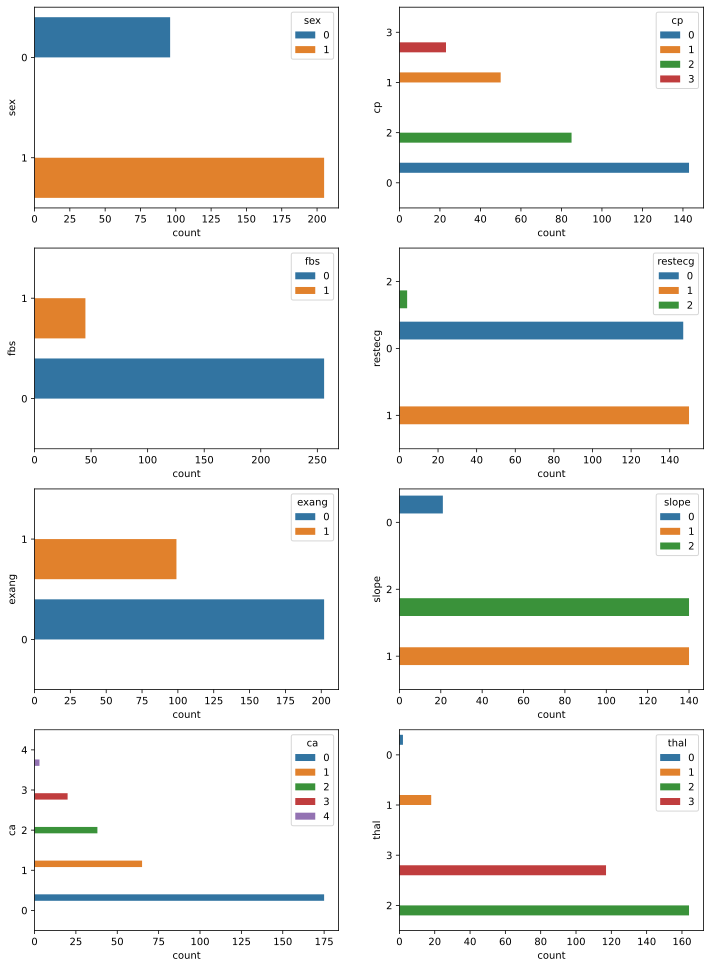

In [117]:
fig , ax = plt.subplots(4, 2, figsize = (12,17))
for i , subplots in zip (categorical_data, ax.flatten()):  
    sns.countplot(y=categorical_data[i],order=categorical_data[i].value_counts(ascending=True).index,ax = subplots, hue= categorical_data[i])
plt.show()

#### Visualization 2: PiePlot for all categorical variables

In [118]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

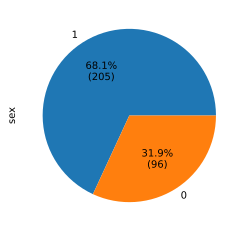

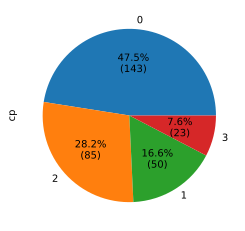

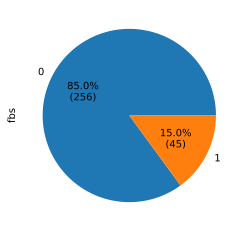

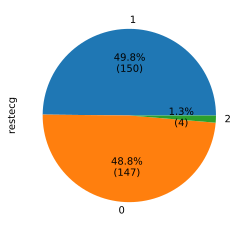

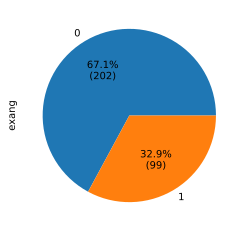

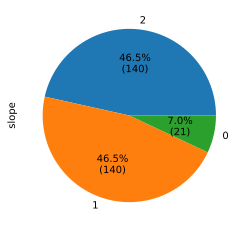

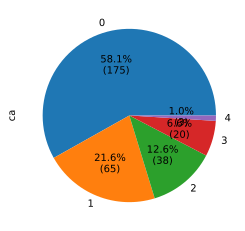

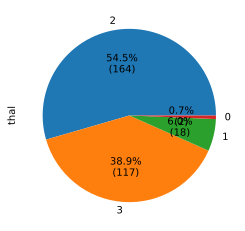

In [119]:
for i in categorical_data:
    s = categorical_data[i].value_counts()
    s.plot.pie(autopct=autopct_format(s));
    plt.show()

###### Occurence of CVD across age category (Histogram with KDE)

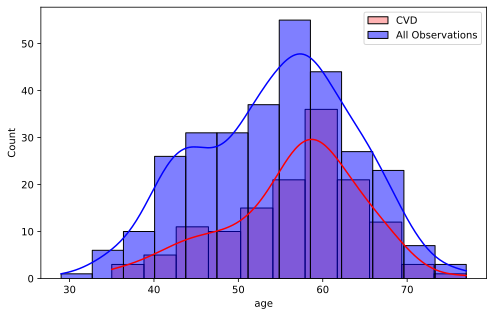

In [120]:
cvd_true = data.loc[output.target == 0]
plt.figure(figsize=(8,5))
sns.histplot(x=cvd_true.age,kde=True,label='CVD',color='red',alpha=0.3)
sns.histplot(x=data.age,kde=True,label='All Observations',color='blue',alpha=0.5)
plt.legend()
plt.show()

###### CVD vs Sex (M/F) -- CountPlot

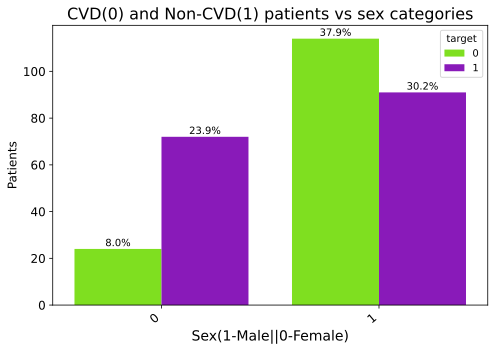

In [128]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x='sex',
                   hue= output.target, 
                   palette=['chartreuse', 'darkviolet'])
plt.xticks(size=12)
plt.xlabel('Sex(1-Male||0-Female)', size=14)
plt.yticks(size=12)
plt.ylabel('Patients', size=12)
plt.title("CVD(0) and Non-CVD(1) patients vs sex categories", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(data['sex'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

###### Resting Blood Pressure (restbps ) for  CVD and non-CVD -- ViolinPlot/BoxPlot 

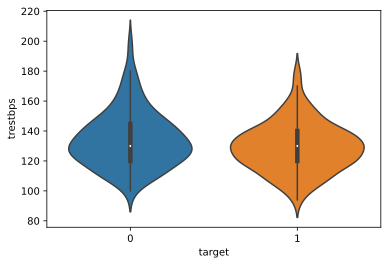

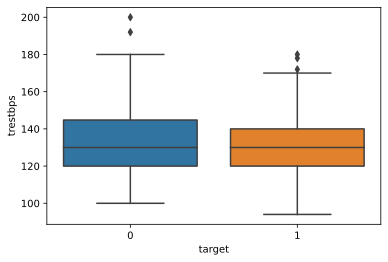

In [130]:
sns.violinplot(data=data,x=output.target,y=data["trestbps"])
plt.show()
sns.boxplot(x=output.target,y=data["trestbps"])
plt.show()

###### Cholestrol Measurement vs Target -- StripPlot

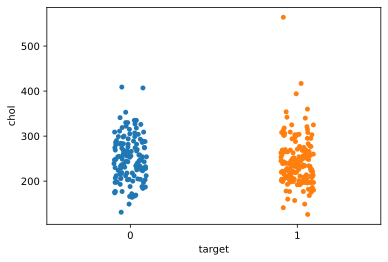

In [132]:
sns.stripplot(y=data["chol"],x=output["target"])
plt.show()

###### Slope of the peak exercise ST segment vs Target

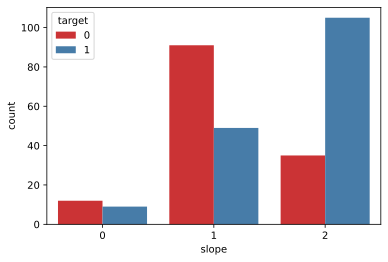

In [133]:
sns.countplot(data['slope'],hue=output["target"],palette='Set1')
plt.show()

###### Results of the blood flow observed via the radioactive dye vs Target

In [134]:
#removing thal=0 from the dataset
output=output.loc[data['thal']!= 0 ]
data=data.loc[data['thal']!= 0 ]
data.thal.unique()

array([1, 2, 3], dtype=int64)

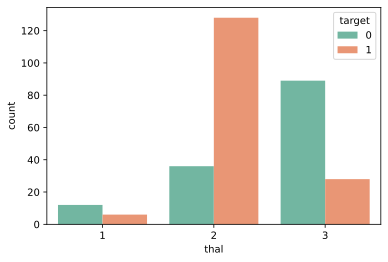

In [135]:
sns.countplot(data.thal,hue=output.target,palette='Set2')
plt.show()

###### Heatmap and pairplot to check for correlation between features and how diff factors affect the occurence of CVD

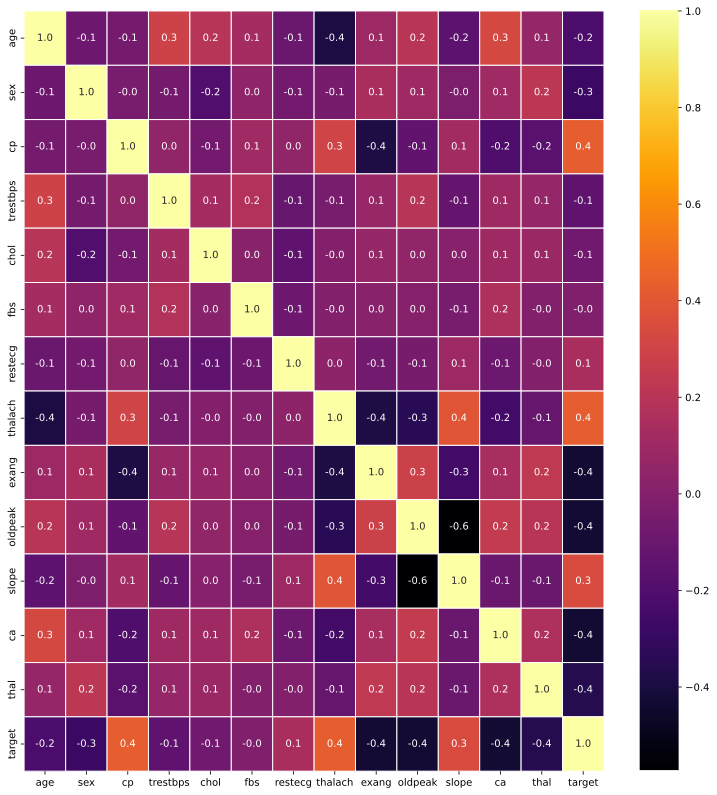

In [136]:
plt.figure(figsize=(13,14))
sns.heatmap(pd.concat([data,output], axis=1).corr(),annot=True, fmt='.1f', linecolor='white',linewidths= 1.001,cmap='inferno')
plt.show()

In [137]:
sns.pairplot(pd.concat([data,output], axis=1),diag_kind="kde", corner=True)
plt.show()

# Baseline models to predict the risk of a heart attack

In [162]:
dataset = pd.read_excel('CEP.xlsx')
dataset.drop_duplicates(keep=False, inplace=True)
dataset=dataset.loc[dataset['thal']!= 0] #removing thal=0 from the dataset
print(dataset.thal.unique())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

[1 2 3]


## Encoding categorical data

###### Encoding the independent variables

In [163]:
cat_col = [1,2,5,6,8,10,11,12]

In [164]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_col)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [188]:
print(X)

[[0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  6.30e+01 1.45e+02 2.33e+02 1.50e+02 2.30e+00]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  3.70e+01 1.30e+02 2.50e+02 1.87e+02 3.50e+00]
 [1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  4.10e+01 1.30e+02 2.04e+02 1.72e+02 1.40e+00]
 [0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00

###### Encoding the dependent variable

In [166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [187]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


## Splitting the dataset into the Training set and Test set

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [170]:
print(X_train)

[[0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  4.10e+01 1.20e+02 1.57e+02 1.82e+02 0.00e+00]
 [1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  6.30e+01 1.08e+02 2.69e+02 1.69e+02 1.80e+00]
 [0.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  5.50e+01 1.40e+02 2.17e+02 1.11e+02 5.60e+00]
 [1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00

In [171]:
print(y_train)

[1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1
 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0
 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1]


In [172]:
print(X_test)

[[0.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00
  0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  6.00e+01 1.17e+02 2.30e+02 1.60e+02 1.40e+00]
 [0.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 0.00e+00 1.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00
  5.80e+01 1.14e+02 3.18e+02 1.40e+02 4.40e+00]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  6.20e+01 1.30e+02 2.31e+02 1.46e+02 1.80e+00]
 [1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 1.00e+00 0.00e+00
  0.00e+00 1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00

In [173]:
print(y_test)

[0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1]


## Feature Scaling

In [174]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 24:] = sc.fit_transform(X_train[:, 24:])
X_test[:, 24:] = sc.transform(X_test[:, 24:])

In [175]:
print(X_train)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  -1.46014061e+00 -7.05814202e-01 -1.72677057e+00  1.35719784e+00
  -9.33045414e-01]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   9.33816150e-01 -1.37699296e+00  4.18907390e-01  8.02061756e-01
   6.86140294e-01]
 [ 0.00000000e+00  1.00000000e+00  1.0

## Training the Logistic Regression model on the Training set

In [180]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Predicting the Test set results

In [184]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]]


In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[18 10]
 [ 7 25]]


0.7166666666666667

## Visualizing Test set results

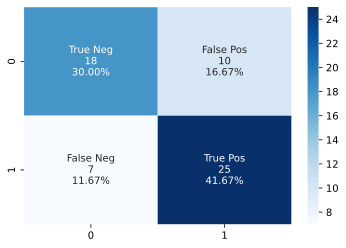

In [183]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [189]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        28
           1       0.71      0.78      0.75        32

    accuracy                           0.72        60
   macro avg       0.72      0.71      0.71        60
weighted avg       0.72      0.72      0.71        60



In [191]:
#creating a logistic regression using statsmodel API
from statsmodels.base import model
import statsmodels.api as sm
from scipy import stats
data1=data
b=["age","trestbps","chol","thalach","oldpeak"]
ss = StandardScaler()
data1[b] = ss.fit_transform(data1[b])
logreg = sm.Logit(output,data1).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.358874
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.4796
Time:                        11:37:15   Log-Likelihood:                -107.30
converged:                       True   LL-Null:                       -206.20
Covariance Type:            nonrobust   LLR p-value:                 9.263e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0484      0.209      0.231      0.817      -0.362       0.459
sex           -1.4770      0.

In [192]:
#features with p-value<0.05
new_features = ['sex','cp','trestbps','thalach','oldpeak','slope','ca']
new_X = data1[new_features]
new_X.head()

sex  cp  trestbps   thalach   oldpeak  slope  ca
0    1   3  0.760382  0.018150  1.075422      0   0
1    1   2 -0.091132  1.637427  2.107965      0   0
2    0   1 -0.091132  0.980963  0.301014      2   0
3    1   1 -0.658808  1.243549 -0.215257      2   0
4    0   0 -0.658808  0.587085 -0.387348      2   0

In [193]:
#splitting the data into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(new_X, y, test_size = 0.25, random_state=5)

print('X1_train:',X1_train.shape)
print('X1_test :',X1_test.shape)
print('y1_train:',y1_train.shape)
print('y1_test :',y1_test.shape)

X1_train: (224, 7)
X1_test : (75, 7)
y1_train: (224,)
y1_test : (75,)


In [194]:
logreg1 = sm.Logit(y1_train, X1_train).fit()
print(logreg1.summary())

Optimization terminated successfully.
         Current function value: 0.391609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  224
Model:                          Logit   Df Residuals:                      217
Method:                           MLE   Df Model:                            6
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.4243
Time:                        11:37:24   Log-Likelihood:                -87.720
converged:                       True   LL-Null:                       -152.36
Covariance Type:            nonrobust   LLR p-value:                 1.824e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.4864      0.427     -3.484      0.000      -2.323      -0.650
cp             1.1047      0.

In [196]:
from sklearn.metrics import precision_score, recall_score, f1_score

logreg1_pred = logreg1.predict(X1_test)
preds1 = list(map(round, logreg1_pred))

print('Accuracy score',accuracy_score(y1_test, preds1))
print('Recall score',recall_score(y1_test, preds1))
print('Precision score',precision_score(y1_test, preds1))
print('f1 score',f1_score(y1_test, preds1))
cm1 = confusion_matrix(y1_test, preds1)
print(cm1)

Accuracy score 0.8533333333333334
Recall score 0.875
Precision score 0.8
f1 score 0.8358208955223881
[[36  7]
 [ 4 28]]


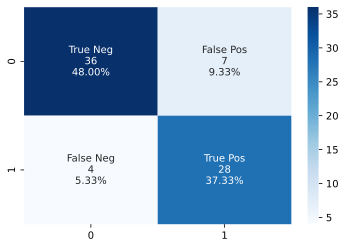

In [197]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')
plt.show()

# Random Forest

In [198]:
# creating a random forest model
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()

In [199]:
data2=pd.read_excel("CEP.xlsx")
X3 = data2.iloc[:, :-1].values
y3 = data2.iloc[:, -1].values

In [200]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X3, y3, test_size = 0.25, random_state = 0)

In [201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [202]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [203]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]]


In [204]:
cm3 = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[18 10]
 [ 7 25]]


0.6666666666666666

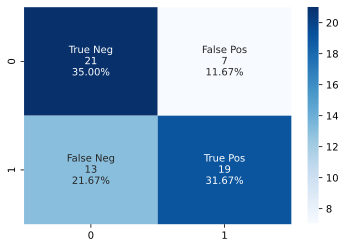

In [205]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm3.flatten()/np.sum(cm3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm3, annot=labels, fmt='', cmap='Blues')
plt.show()

#                                                         **Thank You**